# 선형대수기초(Basic of Linear Algebra)

## chapter 2. 파이썬 기초

### 2.5 깊은 복사

#### 2.5.1 깊은 복사

* mutable 객체 : 리스트 등

* immutable 객체 : 숫자, 문자

In [1]:
# 문자열, 숫자(단일 객체) - 동일한 메모리 주소

x = 3
y = x 
print(x," , ",  y)

3  ,  3


In [2]:
print(id(x)," , ", id(y))

1996155611504  ,  1996155611504


In [3]:
y = 7

In [4]:
print(x," , ",  y)
print(id(x)," , ", id(y))

3  ,  7
1996155611504  ,  1996155611632


* 객체 값 변경, 메모리 주소 변경 (immutable 객체의 새로운 할당)

* 리스트 mutable 객체

In [5]:
a = [1, 2, 3, 4]
id(a)

1996254807488

In [6]:
id(a[0])

1996155611440

In [7]:
id(a[1])

1996155611472

In [8]:
a[0] = 5
print(a, '\n')
print(id(a[0]))

[5, 2, 3, 4] 

1996155611568


원소를 변경한 리스트 a의 0번째 원소인 a[0]의 주소는 기존 주소와 달리 변경됨

In [9]:
# 한 객체에 다른 객체를 담았을 때의 메모리 주소 변화

b = a
print(b)

[5, 2, 3, 4]


In [10]:
print(id(a)," , ", id(b))

1996254807488  ,  1996254807488


In [11]:
print(id(a[0])," , ", id(b[0])) # a와 b 동일

1996155611568  ,  1996155611568


In [12]:
b.append(7) 
print(a," , ", b) # a와 b 동일하게 구성 원소 변화

[5, 2, 3, 4, 7]  ,  [5, 2, 3, 4, 7]


* 리스트 a를 출력해 보면 리스트 b와 동일하게 새로운 값 7이 출력됨

* 리스트 자료형은 mutable한 객체이므로 리스트 a를 b에 할당한 후 리스트b를 변경시키면 이는 a에도 동일하게 적용

* a는 그대로 두고 b만 변경하고 싶은 경우 자신의 의도와는 다르게 다른 객체까지 수정되는 문제가 나타남 -> 이 문제를 해결하기 위해 복사(copy)의 개념을 학습

#### 2.5.2 얕은 복사(shallow copy)

* 객체 b의 변경이 객체 a에 영향을 주지 않게 하려면 다음과 같이 코드 작성

In [13]:
a = [1, 2, 3, 4, 5]
# 얕은 복사를 이용해 리스트 a를 리스트 b에 할당
b = a[:]

* 객체 a와 b는 각기 다른 메모리 주소를 할당 받음

In [14]:
print(id(a)," , ", id(b))

1996254832192  ,  1996254838848


* 하지만, 각 원소들은 같은 메모리 주소를 받음

In [15]:
print(id(a[0])," , ", id(b[0]))

1996155611440  ,  1996155611440


* 객체 b의 0번재 원소에 9 할당 -> 새로운 메모리 주소를 할당 받음

* 객체 b의 0번째 원소만 바뀌는 것을 확인할 수 있음

In [16]:
b[0] = 9
print(a, ", ", b) # 객체 b의 0번째 원소만 바뀌는 것을 확인할 수 있음

[1, 2, 3, 4, 5] ,  [9, 2, 3, 4, 5]


In [17]:
print(id(a[0])," , ", id(b[0]))

1996155611440  ,  1996155611696


* 라이브러리를 활용한 얕은 복사

In [18]:
import copy

a = [1, 2, 3, 4, 5]
b = copy.copy(a)

In [19]:
print(a, ", ", b) 

[1, 2, 3, 4, 5] ,  [1, 2, 3, 4, 5]


In [20]:
print(id(a)," , ", id(b)) # 각기 다른메모리 주소 할당

1996254841088  ,  1996254788608


In [21]:
b[0] = 7
print(a, ", ", b) # 객체 b의 0번째 원소만 바뀌는 것을 확인할 수 있음
print(id(a[0])," , ", id(b[0]))

[1, 2, 3, 4, 5] ,  [7, 2, 3, 4, 5]
1996155611440  ,  1996155611632


* **얕은 복사는 mutable한 객체가 immutable한 객체(숫자형 변수, 문자열 변수)를 원소로 구성하는 경우 유용**

* mutable한 객체 내부에 mutable한 객체가 속하는 경우

In [22]:
import copy

a = [[1, 3], [2, 4]]
b = copy.copy(a)

In [23]:
print(a, ", ", b) 
print(id(a)," , ", id(b)) # 객체는 각기 다른 메모리 주소 할당

[[1, 3], [2, 4]] ,  [[1, 3], [2, 4]]
1996254875584  ,  1996254872832


In [24]:
print(a[0], ", ", b[0]) 
print(id(a[0])," , ", id(b[0])) # 리스트 내 원소는 동일한 메모리 주소 할당

[1, 3] ,  [1, 3]
1996254872640  ,  1996254872640


In [25]:
print(id(a[0][0])," , ", id(b[0][0])) # 리스트 a, b의 0번째 원소의 0번째 원소도 동일한 메모리주소를 가짐

1996155611440  ,  1996155611440


In [26]:
b[0][0] = 7
print(a, ", ", b) # 객체 b와 동일하게 객체 a가 변화됨

[[7, 3], [2, 4]] ,  [[7, 3], [2, 4]]


In [27]:
print(a," , ", b)
print(id(a)," , ", id(b))
print("-"*20)
print(a[0]," , ", b[0])
print(id(a[0])," , ", id(b[0]))
print("-"*20)
print(a[0][0]," , ", b[0][0])
print(id(a[0][0])," , ", id(b[0][0]))

[[7, 3], [2, 4]]  ,  [[7, 3], [2, 4]]
1996254875584  ,  1996254872832
--------------------
[7, 3]  ,  [7, 3]
1996254872640  ,  1996254872640
--------------------
7  ,  7
1996155611632  ,  1996155611632


* mutable한 객체 내부에 mutable한 객체가 존재할 경우, 동일한 메모리 주소를 포인팅하고 있으므로 각기 다른 객체 a, b라 할지라도 내부의 객체를 수정하면 같이 변경됨

#### 2.5.3 깊은 복사

In [28]:
import copy

a = [[1, 2], [3, 4]]
b = copy.deepcopy(a)

In [29]:
print(a," , ", b)
print(id(a)," , ", id(b))
print("-"*20)
print(a[0]," , ", b[0])
print(id(a[0])," , ", id(b[0]))
print("-"*20)
print(a[0][0]," , ", b[0][0])
print(id(a[0][0])," , ", id(b[0][0]))

[[1, 2], [3, 4]]  ,  [[1, 2], [3, 4]]
1996254828224  ,  1996254966912
--------------------
[1, 2]  ,  [1, 2]
1996254827456  ,  1996254829888
--------------------
1  ,  1
1996155611440  ,  1996155611440


* 1. 각 객체는 각기 다른 메모리 주소를 할당받는다.

* 2. 각 객체의 0번째 리스트 원소는 각기 다른 메모리 주소를 할당받는다.

* 3. 각 객체의 0번째 리스트 원소의 0번째 원소는 같은 메모리 주소를 할당받는다.

In [30]:
b[0][0] = 7

print(a," , ", b)
print(id(a)," , ", id(b))
print("-"*20)
print(a[0]," , ", b[0])
print(id(a[0])," , ", id(b[0]))
print("-"*20)
print(a[0][0]," , ", b[0][0])
print(id(a[0][0])," , ", id(b[0][0]))


[[1, 2], [3, 4]]  ,  [[7, 2], [3, 4]]
1996254828224  ,  1996254966912
--------------------
[1, 2]  ,  [7, 2]
1996254827456  ,  1996254829888
--------------------
1  ,  7
1996155611440  ,  1996155611632


* a[0][0]와 b[0][0]의 메모리 주소가 달라지는 것을 확인 

* 얕은 복사의 경우 b의 구성 원소에 변경이 생겼을 경우 리스트 a도 함께 변경됨

* 깊은 복사를 사용할 경우 b의 구성 원소를 변경했다고 하더라도 객체 a에는 영향을 주지 않음

#### 2.5.4 깊은 복사 구현하기

In [31]:
def deepcopy(A):
    """
    깊은 복사(deepcopy) 구현 
    입력값: 깊은 복사를 하고자 하는 행렬 리스트 A
    출력값: 깊은 복사된 결과 행렬 리스트 res
    """
    if type(A[0]) == list:
        n = len(A)
        p = len(A[0])
        res = zero_mat(n, p)
        for i in range(0, n):
            for j in range(0, p):
                res[i][j] = A[i][j]
        return res
    else: 
        n = len(A)
        res = []
        for i in range(0, n):
            res.append(A[i])
        return res

In [32]:
def zero_mat(n, p):
    """
    영 행렬생성
    입력값: 생성하고자 할 영 행렬의 크기 n행, p행
    출력갑: (n x p) 영 행렬 Z
    """
    Z = []
    for i in range(0, n):
        row = []
        for j in range(0, n):
            row.append(0)
        Z.append(row)
    return Z

In [33]:
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [34]:
B = deepcopy(A)

In [35]:
print(A, "\n", B)
print(id(A),"\n", id(B))
print("-"*20)
print(A[0],"\n", B[0])
print(id(A[0]),"\n", id(B[0]))
print("-"*20)
print(A[0][0],"\n", B[0][0])
print(id(A[0][0]),"\n", id(B[0][0]))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]] 
 [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
1996237180480 
 1996237226624
--------------------
[1, 2, 3] 
 [1, 2, 3]
1996237997248 
 1996254828864
--------------------
1 
 1
1996155611440 
 1996155611440


In [36]:
A2 = [1, 2, 3]
B2 = deepcopy(a)
print(A2, "\n", B2)
print(id(A2),"\n", id(B2))
print("-"*20)
print(A2[0],"\n", B2[0])
print(id(A2[0]),"\n", id(B2[0]))

[1, 2, 3] 
 [[1, 2], [3, 4]]
1996254827328 
 1996254872640
--------------------
1 
 [1, 2]
1996155611440 
 1996237998912


## Chapter 3. 행렬

### 3.1. 벡터

In [37]:
# 넘파이 이용 벡터 연산 -> elementwise operation
import numpy as np

u = np.array([1, 2, 3])
v = np.array([4, 5, 6])
w1 = u + v
w2 = u - v
w3 = 3*u
w4 = u*v 
w5 = u/v
print(w1, "\n", w2, "\n", w3, "\n", w4, "\n", w5)

[5 7 9] 
 [-3 -3 -3] 
 [3 6 9] 
 [ 4 10 18] 
 [0.25 0.4  0.5 ]


### 3.2 행렬

In [38]:
import numpy as np

A = np.array([[2, 7], [3, 4], [6, 1]])
B = np.array([[1, 4], [4, -1], [2, 5]])
B2 = np.array([[3, -3, 5], [-1, 2, -1]])
C1 = A + B
C2 = A - B
C3 = 2*A
C4 = np.multiply(A, B) # 행렬의 원소곱(element 끼리)
C5 = np.matmul(A, B2) # 행렬곱

print(C1, "\n")
print("-"*20)
print(C2, "\n")
print("-"*20)
print(C3, "\n")
print("-"*20)
print(C4, "\n")
print("-"*20)
print(C5, "\n")
print("-"*20)

[[ 3 11]
 [ 7  3]
 [ 8  6]] 

--------------------
[[ 1  3]
 [-1  5]
 [ 4 -4]] 

--------------------
[[ 4 14]
 [ 6  8]
 [12  2]] 

--------------------
[[ 2 28]
 [12 -4]
 [12  5]] 

--------------------
[[ -1   8   3]
 [  5  -1  11]
 [ 17 -16  29]] 

--------------------


## chapter 4. 다양한 행렬

### 4.1 전치 행렬(transposed matrix)

* 기존 행렬의 행과 열을 바꾼 행렬

* 기존 행렬의 행 번호가 열 번호가 되고, 열 번호가 행 번호가 됨

* 전치 행렬의 성질

    - $(A^T)^T = A$
    
    - $\left (  A + B \right )^{T} = A^{T} + B^{T} $
    
    - $\left (  A - B \right )^{T} = A^{T} - B^{T} $
    
    - $(aA)^{T} = aA^{T}$
    
    - $(AB)^T = B^{T}A^{T}$

In [39]:
import numpy as np
A = np.array([[1,5], [3, 4], [6, 2]])
At = np.transpose(A)
print(At)

[[1 3 6]
 [5 4 2]]


### 4.2 대칭 행렬(symmetric matrix)

* 기존 행렬과 전치 행렬이 동일한 정사각 행렬을 의미

* $ A = \begin{pmatrix} a & b & c \\ d & e & f \\ g & h & i \\ \end{pmatrix},  \quad A_{ij} = A_{ji},  \quad A = A^{T}$

* 대칭 행렬 성질

    - 대칭 행렬 간 + , - 는 대칭 행렬
    
    - 대칭 행렬 간 행렬곱은 반드시 대칭 행렬이 되는 것은 아님
    
    - 대칭 행렬의 거듭 제곱 $A^n$ 또한 대칭 행렬
    
    - 어떤 행렬 A가 존재할 때, **자기 자신의 전치 행렬을 곱한 결과는 대칭 행렬($AA^{T} ,\, A^{T}A$)**

In [40]:
import numpy as np

A = np.array([[1, 0, 2], [0, 2, 1], [2, 1, 1]])
print(A)

[[1 0 2]
 [0 2 1]
 [2 1 1]]


In [41]:
At = np.transpose(A)
print(At)

[[1 0 2]
 [0 2 1]
 [2 1 1]]


In [42]:
A == At

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [43]:
AA = A 
for i in range(0, 9):
    AA = np.matmul(AA, A)
    print("행렬 A의 ", i + 2, "제곱은")
    print(AA)
    print("="*20)

행렬 A의  2 제곱은
[[5 2 4]
 [2 5 3]
 [4 3 6]]
행렬 A의  3 제곱은
[[13  8 16]
 [ 8 13 12]
 [16 12 17]]
행렬 A의  4 제곱은
[[45 32 50]
 [32 38 41]
 [50 41 61]]
행렬 A의  5 제곱은
[[145 114 172]
 [114 117 143]
 [172 143 202]]
행렬 A의  6 제곱은
[[489 400 576]
 [400 377 488]
 [576 488 689]]
행렬 A의  7 제곱은
[[1641 1376 1954]
 [1376 1242 1665]
 [1954 1665 2329]]
행렬 A의  8 제곱은
[[5549 4706 6612]
 [4706 4149 5659]
 [6612 5659 7902]]
행렬 A의  9 제곱은
[[18773 16024 22416]
 [16024 13957 19220]
 [22416 19220 26785]]
행렬 A의  10 제곱은
[[63605 54464 75986]
 [54464 47134 65225]
 [75986 65225 90837]]


In [44]:
# 비대칭 행렬과 그의 전치행렬
A = np.array([[1, 0, 3], [2, 1, 4], [0, 1, 1]])
print(A)

[[1 0 3]
 [2 1 4]
 [0 1 1]]


In [45]:
At = np.transpose(A)
print(A)

[[1 0 3]
 [2 1 4]
 [0 1 1]]


In [46]:
np.matmul(A, At) # 나와 나의 전치행렬의 곱은 대칭행렬

array([[10, 14,  3],
       [14, 21,  5],
       [ 3,  5,  2]])

In [47]:
np.matmul(At, A) # 나와 나의 전치행렬의 곱은 대칭행렬

array([[ 5,  2, 11],
       [ 2,  2,  5],
       [11,  5, 26]])

### 4.3 대각 행렬(digonal matrix)

* 행렬의 주 대각 원소가 아닌 원소가 0인 정사각 행렬

* 주로 $D$로 표기, diagonal matrix의 약자

    * $D = \begin{pmatrix}
d_1 & 0 & \cdots  & 0 \\
0 & d_2 & \cdots  & 0 \\
\vdots  & \vdots  & \ddots  & \vdots  \\
 0 & 0 & \cdots  & d_n \\
\end{pmatrix}$

* 대각 행렬의 역행렬은 주 대각 원소의 역수를 구함으로써 간단히 구할 수 있음

    - $D^{-1} = \begin{pmatrix}
1/d_1 & 0 & \cdots  & 0 \\
0 & 1/d_2 & \cdots  & 0 \\
\vdots  & \vdots  & \ddots  & \vdots  \\
 0 & 0 & \cdots  & 1/d_n \\
\end{pmatrix}$

* 대각 행렬의 거듭제곱은 대각 원소의 거듭 제곱을 구함으로써 구할 수 있음

    - $D^{k} = \begin{pmatrix}
d_1^{k} & 0 & \cdots  & 0 \\
0 & d_2^{k} & \cdots  & 0 \\
\vdots  & \vdots  & \ddots  & \vdots  \\
 0 & 0 & \cdots  & d_n^{k} \\
\end{pmatrix}$

* 대각 행렬의 성질

    - D가 뒤에 있으면 열의 스칼라배 
    
    - D가 앞에 있으면 행의 스칼라배
    

In [48]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
D = np.diag(np.diag(A))
print(A)
print("-" * 10)
print(D)
# np.diag(A)로 대각 원소 리스트를 구한 뒤, np.diag 함수에 넣으면 대각 행렬을 구할 수 있음

[[1 2 3]
 [4 5 6]
 [7 8 9]]
----------
[[1 0 0]
 [0 5 0]
 [0 0 9]]


In [49]:
A2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
D2 = np.diag([1, 3, 4])
print(A)
print("-" * 10)
print(D)
# 대각 행렬을 임의로 생성

[[1 2 3]
 [4 5 6]
 [7 8 9]]
----------
[[1 0 0]
 [0 5 0]
 [0 0 9]]


In [50]:
AD = np.matmul(A, D)
print(AD)

[[ 1 10 27]
 [ 4 25 54]
 [ 7 40 81]]


In [51]:
DA = np.matmul(D, A)
print(DA)

[[ 1  2  3]
 [20 25 30]
 [63 72 81]]


In [52]:
AD2 = np.matmul(A2, D2)
print(AD2)

[[ 1  6 12]
 [ 4 15 24]
 [ 7 24 36]]


In [53]:
DA2 = np.matmul(D2, A2)
print(DA2)

[[ 1  2  3]
 [12 15 18]
 [28 32 36]]


### 4.4 단위 행렬(identity matrix)

* 주 대각 원소가 1이고 그 밖의 나머지 원소는 모두 0인 대각 행렬

    - $I = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}$


* 항등 행렬이라고도 함



* 단위 행렬의 성질

    - $AI = A\, , \, IA = A$

In [54]:
import numpy as np
I = np.identity(5)
print(I)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [55]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
I = np.identity(3)
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [56]:
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [57]:
AI = np.matmul(A, I)
print(A, "\n", "-"*20, "\n", AI)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 
 -------------------- 
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [58]:
IA = np.matmul(I, A)
print(A, "\n", "-"*20, "\n", IA)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 
 -------------------- 
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### 4.5 영행렬(zero matrix)

* 행렬 구성 원소가 모두 0 일때

* 주로 0으로 표기함

* $A + 0 = A, ~ A - 0 = A,~ 0 - A = -A,~ A - A = 0,~ 0A = 0,~ A0 = 0$

In [59]:
import numpy as np

Z = np.zeros((3, 2))
print(Z)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


### 4.6 삼각 행렬(triangle matrix)

* 행렬의 구성 원소가 삼각형 형태를 나타내는 행렬 

* **상 삼각 행렬(upper triangular matrix)** 주 대각 원소 아래쪽에 있는 모든 원소가 0인 정사각 행렬

    - $A = \begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
0 & a_{22} & a_{23} \\
0 & 0 & a_{33} \\
\end{pmatrix}$

* **하 삼각 행렬(lower triangular matrix)** 주 대각 원소 위쪽에 있는 모든 원소가 0인 정사각 행렬

    - $ A = \begin{pmatrix}
a_{11} & 0 & 0 \\
a_{21} & a_{22} & 0 \\
a_{31} & a_{32} & a_{33} \\
\end{pmatrix}$

* **삼각 행렬의 성질**

    - 삼각 행렬 간 덧셈, 뺄셈, 행렬 곱의 결과는 삼각 행렬
    
    - 상 삼각 행렬의 전치 행렬은 하 삼각 행렬, 하 삼각 행렬의 전치 행렬은 상 삼각 행렬
    
    - 삼각 행렬의 역행렬 또한 삼각 행렬의 형태

In [60]:
# 상 삼각 행렬

import numpy as np
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Au = np.triu(A)
print(Au)

[[1 2 3]
 [0 5 6]
 [0 0 9]]


In [61]:
# 하 삼각 행렬

import numpy as np
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Al = np.tril(A)
print(Al)

[[1 0 0]
 [4 5 0]
 [7 8 9]]


### 4.7 토플리츠 행렬 (Toeplitz matrix)

* 토플리츠 행렬(Toeplitz matrix): 1행의 원소가 2행으로 가면서 한 열씩 오른쪽으로 이동하면서 새로운 원소가 생성되는 행렬

    - $ A = \begin{pmatrix}
a & b & c & d & e \\
f & a & b & c & d \\
g & f & a & b & c \\
h & g & f & a & b \\
i & h & g & f & a \\
\end{pmatrix}$


* 일반화 하면 다음과 같다

    - $ A = \begin{pmatrix}
t_{0} & t_{-1} & t_{-2} & \cdots  & \cdots  & t_{-(n-1)}\\
t_{1} & t_{0} & t_{-1} & \ddots  & \ddots  & \vdots \\
t_{2} & t_{1} & t_{0} & \ddots & \ddots & \vdots\\
\vdots & \ddots & \ddots & \ddots & t_{-1} & t_{-2}\\
\vdots & \ddots & \ddots & t_{1} & t_{0} & t_{-1}\\
t_{n-1} & t_{n-2} & \cdots  & t_{2} & t_{1} & t_{0}\\
\end{pmatrix}$

    - $T_{i, j} = T_{i+1, j+1} = t_{i-j}$
    
* 토플리츠 행렬은 시계열 분석에 자주 사용됨

    - 시계열 데이터를 생각해 보면 시점에 따라 값이 나열되어 있는 형태인데, 이와 같은 시계열 데이터를 행렬 형태로 변환할 때 토플리츠 행렬을 사용함

* scipy 이용 구현

In [62]:
from scipy.linalg import toeplitz

In [63]:
A = toeplitz([1, 0,-2, -4], [1, 3, 5, 7, 9])
print(A)

[[ 1  3  5  7  9]
 [ 0  1  3  5  7]
 [-2  0  1  3  5]
 [-4 -2  0  1  3]]


###  4.8 이중 대각 행렬(bidiagonal matrix)

* 대각 원소 뿐만 아니라 대각 원소의 바로 위쪽 혹은 아래쪽 원소가 0이 아닌 행렬

* upper bidiagonal matrix 예시

    - $ A = \begin{pmatrix}
1 & 3 & 0 & 0 \\
0 & 2 & 2 & 0 \\
0 & 0 & 3 & 5 \\
0 & 0 & 0 & 4 \\
\end{pmatrix}$

* lower bidiagonal matrix

    - $ B = \begin{pmatrix}
1 & 0 & 0 & 0 \\
2 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 4 \\
\end{pmatrix}$

**upper bidiagonal matrix**

In [64]:
import numpy as np

A = np.array([[1, 2, 1, 3], [5, 3, 4, 1], [2, 1, 7, 9], [2, 8, 1, 3]])
print(A)

[[1 2 1 3]
 [5 3 4 1]
 [2 1 7 9]
 [2 8 1 3]]


In [65]:
# 대각 원소 추출
diag_ele = np.diag(A)
print(diag_ele)

[1 3 7 3]


In [66]:
# 추출한 대각 원소를 이용 대각 행렬 생성 
print(np.diag(diag_ele))

[[1 0 0 0]
 [0 3 0 0]
 [0 0 7 0]
 [0 0 0 3]]


In [67]:
# 대각 원소 1칸 위 대각 성분 추출
u_diag_ele = np.diag(A, k = 1)
print(u_diag_ele)
print("-" * 20)
print(np.diag(u_diag_ele, k = 1))

[2 4 9]
--------------------
[[0 2 0 0]
 [0 0 4 0]
 [0 0 0 9]
 [0 0 0 0]]


In [68]:
u_diag = np.diag(diag_ele) + np.diag(u_diag_ele, k = 1)
print(u_diag)

[[1 2 0 0]
 [0 3 4 0]
 [0 0 7 9]
 [0 0 0 3]]


**lower bidiagonal matrix**

In [69]:
# 대각 원소 1칸 아래 대각 성분 추출
l_diag_ele = np.diag(A, k = -1)
print(l_diag_ele)
print("-" * 20)
print(np.diag(l_diag_ele, k = -1))

[5 1 1]
--------------------
[[0 0 0 0]
 [5 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


In [70]:
u_diag = np.diag(diag_ele) + np.diag(l_diag_ele, k = -1)
print(u_diag)

[[1 0 0 0]
 [5 3 0 0]
 [0 1 7 0]
 [0 0 1 3]]


### 4.9 하우스홀더 행렬(householder matrix)

* 어떤 행렬을 다른 형태로 변환할 때 사용하는 행렬

* 하우스 홀더 행렬은 정사각 행렬이며, 모든 열이 정규 직교(orthonormal)한다는 특징이 있음

* 하우스 홀더 행렬은 벡터 $v$ 와 $I$를 이용해 구할 수 있음 

    - $H = 1 - 2\cfrac{{\,v}{v^T}}{{v^T}{v}}$
    
    - $v = \begin{pmatrix}
v_{1} \\
v_{2} \\
\vdots  \\
v_{n}
\end{pmatrix}$

    - **${v}{v^T}$** : 벡터의 외적 
    
    - **${v^T}{v}$** : 벡터의 내적
    

**넘파이 이용 하우스 홀더 행렬 구현**

In [71]:
import numpy as np

v = np.array([1 , 0, 2, 3])

n = len(v)
print(n)

# 두 벡터의 외적
outer_mat = np.outer(v, v)

# 두 벡터의 내적
inner_val = np.inner(v, v)

# 벡터의 원소 길이 만큼의 단위 행렬
I = np.identity(n)

# 하우스 홀더 행렬 계산식에 따라 연산
H = I - (2/inner_val)*outer_mat

4


In [72]:
print("하우스 홀더 행렬을 만들기 위해 사용한 벡터 : \n", v)
print("=="*20)
print("하우스 홀더 행렬 결과 : \n", H)
print("--"*20)
print("v 벡터의 외적 : \n", outer_mat)
print("--"*20)
print("v 벡터의 내적 : ", inner_val)
print("--"*20)
print("계산에 사용된 단위 벡터 : \n", I)

하우스 홀더 행렬을 만들기 위해 사용한 벡터 : 
 [1 0 2 3]
하우스 홀더 행렬 결과 : 
 [[ 0.85714286  0.         -0.28571429 -0.42857143]
 [ 0.          1.          0.          0.        ]
 [-0.28571429  0.          0.42857143 -0.85714286]
 [-0.42857143  0.         -0.85714286 -0.28571429]]
----------------------------------------
v 벡터의 외적 : 
 [[1 0 2 3]
 [0 0 0 0]
 [2 0 4 6]
 [3 0 6 9]]
----------------------------------------
v 벡터의 내적 :  14
----------------------------------------
계산에 사용된 단위 벡터 : 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## Chapter 5. 선형 시스템

* 선형 방정식이 다수 존재하는 경우, 선형 방정식의 집합을 연립 1차 방정식(system of linear equation) 혹은 **선형 시스템(linear system)** 이라고 함
    - 삼각 함수, 지수 함수와 같은 형태로 나타는 경우는 선형방정식이 아님
    
    - 선형 방정식에서는 변수끼리의 곱이나 제곱근을 포함하지 않음


* 일반적인 선형 시스템

$$a_{11}x_{1} + a_{12}x_{2} + \cdots  + a_{1p}x_{p} = b_{1}$$
$$a_{21}x_{1} + a_{22}x_{2} + \cdots  + a_{2p}x_{p} = b_{2}$$
$$\vdots$$
$$a_{n1}x_{1} + a_{n2}x_{2} + \cdots  + a_{np}x_{p} = b_{n}$$

* 일반적인 선형 시스템의 상수 부분만 모아서 행렬 형태로 나타낸 것 : **첨가 행렬(Argumented matrix)**

    - 첨가 행렬을 이용하면 선형 시스템의 해를 보다 쉽게 구할 수 있음

$$\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1p} & b_1 \\
a_{21} & a_{22} & \cdots & a_{2p} & b_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{np} & b_{n} \\
\end{pmatrix}$$


* 동차 선형 시스템(homogeneous linear system)

    - 선형 시스템의 우변이 모두 0이면 해당 선형 시스템을 동차 선형 시스템이라고 부름
    
    - 적어도 하나의 해가 존재한다는 의미
    
    - 방정식 개수보다 변수의 개수가 많은 동차 선형 시스템은 항상 무한개의 해를 가짐
    

In [73]:
# 넘파이 solve 이용

import numpy as np
X = np.array([[3, 1, 2], [2, 6, -1], [4, 0, -1]])
Y = np.array([[5], [1], [3]])

sol = np.linalg.solve(X, Y)

In [74]:
print(sol)

[[1.]
 [0.]
 [1.]]


## Chapter 6. 행렬식

* 삼각 행렬의 행렬식: 주 대각 원소의 곱과 같음 $det(A) = a_{11}a_{22}a_{33}\cdots$

* 대각 행렬의 행렬식: 주 대각 원소의 곱과 같음 $det(A) = a_{11}a_{22}a_{33}\cdots$

* 전치 행렬의 행렬식: 정사각 행렬 A의 행렬식과 전치 행렬의 행렬식은 동일함 $det(A) = det(A^{T})$

* 특정 행과 열의 원소가 모두 0일때 행렬식: 0 , $det(A) = 0$

* 특정 행과 열이 서로 비례할 때 행렬식: 0 

* $det(kA) = k^ndet(A)$

* 행렬 곱과 행렬식 $det(AB) = det(A)det(B)$

In [75]:
import numpy as np

A = np.array([[3, 2, 0], [-1, -3, 6], [2, 3, -5]])
detA = np.linalg.det(A)
print(detA)

5.000000000000001


## Chapter 7. 역행렬

* $AA^{-1} = A^{-1}A = I$

* ${AB}^{-1} = B^{-1}A^{-1}$

* 행렬식이 0이면 역행렬이 존재하지 않음 

* 역행렬이 존재하지 않는 행렬: 특이 행렬(singular matrix)

* 여인수로 구성된 행렬: 여인수 행렬(matrix of cofacors from A) 

    $$\begin{pmatrix}
C_{11} & C_{12} & \cdots & C_{1p} & C_1 \\
C_{21} & C_{22} & \cdots & C_{2p} & C_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
C_{n1} & C_{n2} & \cdots & C_{np} & C_{n} \\
\end{pmatrix}$$

* 여인수 행렬의 전치 행렬: 수반 행렬(adjoint of A), $adj(A)$

* 행렬 A의 역행렬은 행렬식과 수반 행렬을 이용하여 다음과 같이 구함

$$A^{-1} = \cfrac{1}{det(A)} adj(A)$$

* 정사각 행렬의 거듭제곱: $$A^0 = I$$  $$A^{n} = AA \cdots A$$  $$A^{n}B^{m} = A^{n+m}$$  $$(A^{n})^{m} = A^{n+m}$$

* 역행렬의 거듭제곱: $$A^{-n} = (A^{-1})^{n} = A^{-1}A^{-1} \cdots A^{-1}$$  $$(A^{-1})^{-1} = A$$ $$(A^{n})^{-1} = (A^{-1})^{n}$$
$$(aA)^{-1} = \cfrac{1}{a}A^{-1}$$

* 역행렬과 전치행렬: $$(A^{-1})^{T} = (A^{T})^{-1}$$

* 역행렬과 행렬식 : $$ det(A^{-1}) = \cfrac{1}{det(A)}$$


In [76]:
import numpy as np
A = np.array([[3, 2, 0], [-1, -3, 6], [2, 3, -5]])
invA = np.linalg.inv(A)
print(A)
print('---'*20)
print(invA)

[[ 3  2  0]
 [-1 -3  6]
 [ 2  3 -5]]
------------------------------------------------------------
[[-0.6  2.   2.4]
 [ 1.4 -3.  -3.6]
 [ 0.6 -1.  -1.4]]


## Chapter 8. 기저와 차원

* **벡터 공간(vector space)** : 덧셈과 스칼라 곱이 정의된 공간, 선형 공간, 벡터 집합이 존재할 때 해당 벡터들로 구성할 수 있는 공간

* **부분 공간(subspace)** : 벡터 공간의 부분 공간

* **스팬(span)** : 집합 S에 속하는 기저 벡터들로 구성되는 2차원 부분 공간을 W라고 했을 때, S는 부분 공간 W를 span 한다고 말하고, W = span(S)라고 표현

    - 두 기저 벡터로 span 할 수 있는 벡터 공간은 2차원 평면임


* **선형 변환(linear transformation)** : 두 벡터 공간 사이의 함수

* **선형 조합(linear combination)** : $w = a_{1}\textbf{u}_{1} + a_{2}\textbf{u}_{2} + \cdots + a_{n}\textbf{u}_{n}$ 

* **선형 독립(linear independent)** : 특정 벡터를 다른 벡터의 선형 조합으로 표현할 수 없을 때

* **선형 종속(linear dependent)** : 특정 벡터를 다른 벡터의 선형 조합으로 표현할 수 있을 때

* **기저(basis)** : 벡터 공간을 생성하는 선형 독립인 벡터들, 기저의 조합으로 공간 생성 $S_1, S_2, \cdots , S_n$이 n차원 공간 S의 기저이면, 차원 공간 내에 존재하는 모든 벡터는 $c_1S_1+c_2S_2 + \cdots + c_nS_n$ 의 오직 한가지 형태로 표현할 수 있음

* 벡터 공간 $\textbf{S}$ 의 임의의 기저를  $ \left\{  S_1, S_2, \cdots , S_n \right \}$ 이라고 했을 때 벡터 공간은 다음과 같은 성질을 만족함

    - n개가 넘는 벡터가 만드는 집합은 선형 종속
    
    - n개 미만의 벡터가 만드는 집합은 벡터 공간 $\textbf{S}$를 생성할 수 없음

    - 벡터 공간의 모든 기저 벡터의 개수는 동일함
    
* **차원(dimension)** 이란 해당 공간을 구성하는 기저 벡터의 개수

* **행 공간(row space)** : 행 벡터로 span 할 수 있는 공간, 행 벡터 n개로 나타낼 수 있는 공간 (n x p matrix 일 경우)

* **열 공간(column space)** : 열 벡터로 span 할 수 있는 공간, 열 벡터 p개로 나타낼 수 있는 공간 (n x p matrix 일 경우)

    * 행 공간의 차원과 열 공간의 차원은 같음

* **영 공간(null space)** : 행렬 A가 주어질 때 $Ax = 0$ 을 만족하는 모든 벡터 x의 집합

* **랭크(Rank)** : 열 벡터에 의해 span된 벡터 공간의 차원, 행 공간과 열 공간의 공통 차원 $rank(A)$

* **널리티(nullity)** : 행렬 A의 영 공간의 차원

    - 행렬 $A$가 임의의 행렬이면 $ransk(A) = rank(A^{T})$
    
    - 행렬 A가 n개의 열을 가진 행렬일때, $rank(A) + nullity(A) = n$을 만족

## Chapter 9. 내적

* **내적 (inner product)** : 벡터와 벡터 연산 결과값으로 스칼라가 나옴

    * $\left< \mathbf{u}, \mathbf{v} \right> = \mathbf{u}^{T}\mathbf{v}$ : 두 열 벡터의 내적을 구할 때는 두 열 벡터 중 하나의 벡터를 전치(transpose)시켜 행 벡터로 변환한 후 나머지 벡터와 벡터 곱을 하면 내적 값을 구할 수 있음
    
    * 벡터의 길이(norm)를 구하거나 벡터 사이의 관계를 파악할 수 있음
    
    * 벡터의 길이(length)는 노름(norm)이라고 하며 자기 자신의 내적 값의 제곱근을 계산함으로써 구할 수 있음
    
    * 벡터 $\mathbf{u}$의 길이는 $\left\| \mathbf{u} \right\|$ 로 표기함 ( $\left\| \mathbf{u} \right\| $ = $\sqrt{{u_{1}}^{2} + {u_{2}}^{2} + \cdots + {u_{n}}^{2}}$ )
    * $\mathbf{u} \cdot \mathbf{v} = \left\| \mathbf{u} \right\| \cdot \left\| \mathbf{v} \right\| cos(\theta)$

* **정사영(projection)** : 한 벡터 공간에 속한 벡터를 부분 공간으로 수직으로 투영하는 것을 말함

    - 내적 결과가 음수라면 $proj_v u$는 벡터 $v$와 반대 방향인 것을 알 수 있음

* **직교(orthogonal)** 두 직선 또는 두 평면이 직각을 이루며 만나는 것 $\mathbf{u} \cdot \mathbf{v} = \left\| \mathbf{u} \right\| \cdot \left\| \mathbf{v} \right\| cos(\theta) = 0$ 

* **정규 직교(orthonormal)** : 각 벡터의 길이가 1이면서 벡터 공간에 존재하는 모든 벡터가 서로 직교하는 것

* **정규 직교 벡터(orthonormal vector)** : 직교 공간에 존재하는 직교 벡터의 길이가 모두 1인 경우

* **정규 직교 공간(orthonormal space)** : 정규 직교 벡터가 만드는 공간

* **정규화(normalization)** : 해당 벡터의 길이(norm)로 나누어서 직교 벡터를 정규 직교 벡터로 변환하는 방법 $\mathbf{v} = \frac{1}{\left\| \mathbf{u} \right\|}  \cdot u$

    * 정규화한 벡터끼리 내적할 경우에도 0이 됨 -> 직교 벡터를 정규화하면 정규 직교 벡터가 됨

    

* **그램-슈미트 과정** : 기저벡터(s) ->  직교 기저(u) 벡터 찾는 과정

* **그램-슈미트 과정을 이용한 QR 분해**

    - 1. 직교 벡터($s_1$)을 직교 기저 벡터 ($u_1$)로 설정
    
    - 2. 그램-슈미트 과정을 통해 직교 기저 벡터 ($u_2$) 생성
    
    - 3. 그램-슈미트 과정을 통해 직교 기저 벡터 ($u_3$) 생성
    
    - 4. 직교 기저 벡터 ($u_1, u_2, u_3$)를 정규 직교 기저 벡터($v_1, v_2, v_3$)로 변환
    
    - 5. $ Q =  \left ( v_1, v_2, v_3 \right )$  $$R = \begin{pmatrix}
\left< a_{1}, v_{1} \right> &  \left< a_{2}, v_{1} \right>& \left< a_{1}, v_{1} \right> \\
0 & \left< a_{2}, v_{2} \right> & \left< a_{2}, v_{2} \right> \\
0 & 0 & \left< a_{3}, v_{3} \right> \\
\end{pmatrix}$$

* 하우스 홀더 행렬을 이용한 QR 분해

    * 1. $A_1 = A$ 가정
    
    * 2. 다음 식 이용 $v_1$ 벡터 구하기 $$v_1 = a_1 + sign(a_1)\left\| a_1 \right\| e_{1}$$ 
    
    * 3. $v_1$ 이용 하우스 홀더 행렬 $H_1$ 구하기  $$H_1 = 1 - 2\cfrac{{\,v_1}{{v_1}^T}}{{{v_1}^T}{v_1}}$$
    
    * 4. $H_1 A_1$ 행렬곱 구하고 $H_1 A_1$ 에서 1행과 1열을 삭제하여 $A_2$ 로 축소
    
    * 5.  $A_2$ 이용, 같은 방식으로 $H_2$,  $H_3$ 구하기
    
    * 6. $ R = H_3 H_2 H_1 A$, $ \quad Q = H_1 H_2 H_3$ 구하기 


In [77]:
# 넘파이 QR 분해 

import numpy as np
A = np.array([[1, 0, 1], [0, 1, 1], [1, 2, 0]])

Q, R = np.linalg.qr(A)

print(Q)
print("---"*20)
print(R)

[[-0.70710678  0.57735027 -0.40824829]
 [-0.         -0.57735027 -0.81649658]
 [-0.70710678 -0.57735027  0.40824829]]
------------------------------------------------------------
[[-1.41421356 -1.41421356 -0.70710678]
 [ 0.         -1.73205081  0.        ]
 [ 0.          0.         -1.22474487]]


In [78]:
print(A)
print("---"*20)
print(np.round(np.matmul(Q,R), 6))

[[1 0 1]
 [0 1 1]
 [1 2 0]]
------------------------------------------------------------
[[ 1. -0.  1.]
 [ 0.  1.  1.]
 [ 1.  2. -0.]]


### Chapter 10. 다양한 곱 연산

### 10.1 외적과 크로네커 곱

* **외적(outer product)** 또는 **텐서 곱(tensor product)**

$$\mathbf{u} \bigotimes \mathbf{v} = \mathbf{u} \mathbf{v^{T} } = \begin{pmatrix}
u_1 \\
u_2 \\
u_3\end{pmatrix} \begin{pmatrix}
v_1 & v_2 & v_3 & v_4 \\
\end{pmatrix} = \begin{pmatrix}
u_1 v_1 & u_1 v_2 & u_1 v_3 & u_1 v_4\\
u_2 v_1 & u_2 v_2 & u_2 v_3 & u_2 v_4\\
u_3 v_1 & u_3 v_2 & u_3 v_3 & u_3 v_4\\
\end{pmatrix}$$

* **크로네커 곱(Kronecker product)** : 원소별로 대상 행렬을 곱함 -> nm x pd로 커짐

$$ \mathbf{A} \bigotimes \mathbf{B} = \begin{pmatrix}
u_1 B & u_1 B& u_1 B& u_1 B\\
u_2 B& u_2 B& u_2 B& u_2 B\\
u_3 B& u_3 B& u_3 B& u_3 B\\
\end{pmatrix} $$

### 10.2 벡터 곱

* **벡터 곱(vector product) 또는 크로스 곱(cross product)** 는 3차원 공간의 벡터들 간에 적용할 수 있는 연산 (단위 벡터 활용)

$$ \mathbf{u} \times \mathbf{v} = \begin{vmatrix}
i & j & k \\
u_1 & u_2 & u_3 \\
v_1 & v_2 & v_3 \\
\end{vmatrix} = \begin{vmatrix}
u_2 & u_3 \\
v_2 & v_3 \\
\end{vmatrix}i - \begin{vmatrix}
u_1 & u_3 \\
v_1 & v_3 \\
\end{vmatrix}j + \begin{vmatrix}
u_1 & u_2 \\
v_1 & v_2 \\
\end{vmatrix}k $$

* 벡터 곱 u x v는 벡터 u와 벡터 v에 수직인 벡터를 의미

### 10.3 삼중곱

* **스칼라 삼중곱**

$$\mathbf{u} \cdot(\mathbf{v} \times \mathbf{w}) = \mathbf{u} \cdot \begin{pmatrix}\begin{vmatrix}
i & j & k \\
v_1 & v_2 & v_3 \\
w_1 & w_2 & w_3 \\
\end{vmatrix}\end{pmatrix}  = \begin{vmatrix}
v_2 & v_3 \\
w_2 & w_3 \\
\end{vmatrix}u_1 - \begin{vmatrix}
v_1 & v_3 \\
w_1 & w_3 \\
\end{vmatrix}u_2 + \begin{vmatrix}
v_1 & v_2 \\
w_1 & w_2 \\
\end{vmatrix}u_3 = \begin{vmatrix}
u_1 & u_2 & u_3 \\
v_1 & v_2 & v_3 \\
w_1 & w_2 & w_3 \\
\end{vmatrix}$$

* **벡터 삼중곱** : 벡터 간 연산을 모두 벡터 곱으로 수행하는 것

$$ \mathbf{u} \times (\mathbf{v} \times \mathbf{w})$$

In [79]:
# 넘파이 이용 외적(outer product)

import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5])

res = np.outer(a, b)
print(res)

[[ 4  5]
 [ 8 10]
 [12 15]]


## Chapter 11. 고윳값과 고유벡터

### 11.1 고유값 및 고유벡터 정의

* 고윳값은 영어로 eigenvalue 라고 하는데 이때 쓰이는 단어인 eigen은 특성(charateristics)이라는 뜻을 담고 있음

    - 고윳값, 고유 벡터에서 말하는 특성이란 벡터의 방향은 변하지 않고 크기만 변하는 특성을 의미


* **고유 벡터(eigenvector)** 란 벡터에 선형 변환했을 때, 방향은 변하지 않고 크기만 변하는 벡터를 의미 

* **고윳값(eigen value)** 선형 변환 이후 변한 크기 

$$Ax = \lambda x \quad \lambda : eigen \, value$$

* 위 수식의 좌변은 벡터 $x$에 선형 변환 $A$를 취한 것을 의미. 우변은 기존 벡터 $x$의 방향은 변하지 않고 길이가 $\lambda$ 만큼 변했다는 것을 의미

    -  $\lambda$ 값이 클수록 기존 벡터 $x$의 길이가 길어짐을 의미하고  $\lambda$ 값이 작을수록 기존 벡터 $x$의 길이가 짧아짐을 의미


* 고윳값의 부호를 보면 고유 벡터의 방향을 알 수 있고, 고윳값의 크기를 보면 고유 벡터의 길이를 알 수 있음
    
    - $\lambda \le -1 $ 이면 기존 벡터의 길이는 길어지고 방향이 기존 벡터와 반대인 벡터로 변환됨

    - $ -1 \ge \lambda \le 0 $ 이면 기존 벡터의 길이보다 짧고 방향이 반대인 벡터로 변환됨

    - $ 0 \ge \lambda \le 1 $ 이면 기존 벡터의 길이보다 짧고 방향이 동일한 벡터로 변환됨

    - $ 1 \ge \lambda $ 이면 기존 벡터의 길이보다 길고 방향이 동일한 벡터로 변환됨

* 2 x 2 행렬의 고윳값과 고유 벡터 구하기

    - 동차 선형 시스템에서 고윳값 $\lambda$가 존재하기 위한 필요충분 조건은 $ \left ( A - \lambda I \right ) $의 행렬식이 0이 되는 것

$$ Ax = \lambda x \Leftrightarrow Ax - \lambda x  = 0 \Leftrightarrow \left ( A - \lambda I \right )x = 0 $$

$$det\left ( A - \lambda I \right ) = 0$$

* $det\left ( A - \lambda I \right ) = 0$ 식을 **특성 방정식(characteristic equation)** 이라고 함

    - 고윳값을 구한다는 말의 의미는 위와 같은 특성 방정식을 만족하는 $\lambda$를 찾는 다는 말과 같음


* $\lambda$를 구한 후 x 벡터를 구하면 고유 벡터를 구할 수 있음(정규화 필요)

### 11.2 QR 분해를 이용한 고유값, 고유 벡터 구하기 

* 초기 행렬 $A_0$ 에서  $A_k$로 QR 분해 반복될수록 $A_k$는 삼각 행렬 형태로 수렴함

    * 삼각 행렬의 고유값은 대각 원소의 곱이므로 삼각 행렬 $A_k$의 대각 원소를 모두 곱합으로써 행렬 $A$ 값을 구함

### 11.3 고윳값과 고유 벡터의 성질

* $A^{n}x = (\lambda)^{n}x$

* 정사각 행렬 A가 가역 행렬이기 위한 필요충분조건은 행렬 A의 고윳값이 0이 아닌 것

* 고유벡터는 유일하지 않음

    - 부호가 바뀌거나 임의의 스칼라가 곱해져도 $Ax = \lambda x$ 식이 변하지 않으므로 고유 벡터는 유일하지 않음

In [80]:
# 넘파이 이용 실습

import numpy as np 

A = np.array([[3, 0], [8, -1]])
print(A)

[[ 3  0]
 [ 8 -1]]


In [81]:
e, v = np.linalg.eig(A)

In [82]:
print(e)
print(v)

[-1.  3.]
[[0.         0.4472136 ]
 [1.         0.89442719]]


In [83]:
A2 = np.array([[4, 0, 1], [-2, 1, 0], [-2, 0, 1]])
print(A2)

[[ 4  0  1]
 [-2  1  0]
 [-2  0  1]]


In [84]:
e2, v2 = np.linalg.eig(A2)

print(e2)
print(v2)

[1. 3. 2.]
[[ 0.          0.57735027 -0.33333333]
 [ 1.         -0.57735027  0.66666667]
 [ 0.         -0.57735027  0.66666667]]


## Chapter 12. 직교 행렬

### 12.1 직교 행렬

* **직교 행렬(orthogonal matrix)** 어떤 행렬의 행 벡터(row vector)와 열 벡터(column vector)가 유클리드 공간의 정규 직교 기저를 이루는 행렬

* **정규 직교 행렬(orthonormal matrix)** 행렬을 구성하는 각 행 벡터 혹은 열 벡터의 길이가 1이며 서로 수직인 벡터로 이루어진 행렬

    - 직교 행렬은 자기 자신과 자신의 전치 행렬을 행렬곱하면 단위 행렬이 됨, 직교 행렬 A의 역행렬은 자기 자신의 전치 행렬(transposed matrix)가 됨
    
        $$ AA^{T} = A^{T}A = I , \quad A^{-1} = A^{T} $$

* 직교행렬의 성질 

    - 직교 행렬의 전치 행렬은 직교 행렬임

    - 직교 행렬의 역행렬은 직교 행렬

    - 직교 행렬끼리의 곱의 결과는 직교 행렬

    - 직교 행렬의 행렬식은 1 또는 -1 

### 12.2 닮음

* 정사각 행렬 A, B에 대해 다음을 만족하는 가역 행렬 P가 존재할 때, 정사각 행렬 A, B는 서로 **닮음(similar)**

    $$B = P^{-1}AP$$
    
*  위 식을 만족하는 직교 행렬(orthogonal matrix) P가 존재할 때 행렬 B는 행렬 A에 직교 닮음(orthogonally similar)라고 함

### 12.2 닮음의 성질

1. 서로 닮은 행렬의 행렬식은 동일함

    $$det(A) = det(B)$$

2. 행렬 $A$가 가역 행렬이라는 말은 $P^{-1}AP$가 가역 행렬이라는 말과 같음

3. 행렬 $A$와 행렬 $P^{-1}AP$의 랭크와 널리티는 동일함

    $$rank(A) = rank(P^{-1}AP)$$
    $$nullity(A) = nullity(P^{-1}AP)$$
    
4. 행렬 $A$와 행렬 $P^{-1}AP$의 대각합은 동일함

    $$tr(A) = tr(P^{-1}AP)$$

5. 행렬 $A$와 행렬 $P^{-1}AP$의 고유값은 동일함


In [85]:
# 넘파이를 이용한 직교 행렬 여부 확인

import numpy as np

A = np.array([[1/(2**0.5), -1/(2**0.5)], [1/(2**0.5), 1/(2**0.5)]])
At = np.transpose(A)

# 자기 자신과 자기 자신의 전치행렬을 행렬곱하였을 때 단위 행렬이 나오면 직교 행렬이다.
res = np.matmul(At, A)
print(np.round(res, 6))

[[1. 0.]
 [0. 1.]]


## Chapter 13. 대각화

### 13.1 대각화의 개념

* **행렬의 대각화(diagonalization)** : 행렬을 대각 행렬로 만드는 것

    * 정사각 행렬 $A$에 대해 $P^{-1}AP$가 대각 행렬이 되는 가역 행렬 $P$가 존재하면 행렬 $A$는 **대각화 가능(digonalizable)**
    
    * 행렬의 대각화 가능 여부는 해당 행렬의 고윳값의 개수를 보면 판단할 수 있음 

        - n x n 크기의 행렬 $A$가 대각화 가능하려면 행렬 $A$는 n개의 서로 다른 고윳값을 가져야 함

        - 행렬 $A$의 고윳값 개수가 n 보다 작으면 행렬 $A$는 대각화 불가능한 행렬

### 13.2 직교 대각화의 개념

* **직교 대각화(orthogonal diagonalization)**

    - $ B = P^{-1}AP $ 에서 정사각 행렬 $B$가 대각 행렬 $D$ 일 경우($ D = P^{-1}AP = P^{T}AP $ 를 만족하는 직교 행렬 $P$가 존재하는 경우)

    - 아래의 식을 만족하며 직교 행렬 $P$는 $A$를 직교 대각화 한다고 말하며 $A$는 직교 대각화 가능(orthogonally diagonalizable)하다고 말함
    
$$ D = P^{-1}AP = P^{T}AP $$
    
    
        - 행렬 $A$에 선형 변환을 취한 결과, 대각 원소만 남는 대각 행렬이 된다고 생각


* 직교 대각화 가능 조건 

    1. 행렬 $A$의 고유 벡터는 n개의 정규 직교 벡터를 만족해야 함

    2. 행렬 $A$가 직교 대각화 가능하려면 $A$는 반드시 대칭 행렬($A^{T} = A$)이어야 함

### 13.3 고윳값 분해

* **고윳값 분해(eigenvalue decomposition)** 는 직교 대각화의 한 종류

    * 직교 대각화에서 쓰이는 직교 벡터 $P$는 고윳값 분해에서는 고유 벡터를 이용해 만들수 있고, 대각 행렬의 원소에 해당하는 것이 고윳값이라고 생각하면 쉬움


* $\lambda_1, \lambda_2, \lambda_3$은 행렬 $A$의 고유값이고 $ u_1, u_2, u_3 $는 각 고윳값에 해당하는 고유 벡터라고 하면 고윳값 분해는 아래와 같이 표현 가능

$$ A = PDP^{T} $$
$$ \begin{pmatrix}
\sigma_11 & \sigma_12 & \sigma_13 \\
 \sigma_21 & \sigma_22 & \sigma_23 \\
 \sigma_31 &  \sigma_32 &  \sigma_33 \\
\end{pmatrix} = \begin{pmatrix}
u_1 & u_2 & u_3 \\
\end{pmatrix}\begin{pmatrix}
\lambda_1 & 0 & 0 \\
0 & \lambda_2 & 0 \\
0 & 0 &  \lambda_3\\
\end{pmatrix}\begin{pmatrix}
{u_1}^{T} \\
{u_2}^{T} \\
{u_3}^{T} \end{pmatrix} $$


### 13.4 특이값 분해

* **특이값 분해(Singular Value Decomposition)** : 정사각 행렬을 대상으로 하는 고윳값 분해를 m x n행렬로 일반화시킨 것

**(배경)**

* 특이값 분해도 행렬의 차원 축소를 위한 도구로 쓰임

    - 차원 축소란 주어진 행렬의 차원보다 낮은 차원으로 적합시킬 수 있는 기존 행렬의 차원보다 낮은 차원의 공간을 찾는 것

    - 만약 행렬 A가 p차원이라고 했을때, 행렬 A를 d차원(p > d)으로 축소한 행렬을 B라고 하면, 결국 특이값 분해는 차원 축소 행렬 B를 찾는 데에 사용됨
    
    - 행렬 A를 차원 축소시키는 것은 행렬 A의 n개의 점을 표현할 수 잇는 기존 p보다 작은 차원인 d차원의 부분 공간(subspace)을 찾는 문제라고 볼 수 있음
   
    
* 차원 축소 방법은 데이터와 부분 공간으로부터의 수직 거리를 최소화 하는 것

    - 직선거리의 최소화는 제곱합(sum of square)을 최소화 하는 것

    - 제곱합을 사용한다는 말은 $A^{T}A, \, AA^{T}$ 를 사용하는 것이며, 차원 축소의 일환인 특이값 분해는 원본 행렬 $A$를 다루기보다는 $A^{T}A, \, AA^{T}$를 다루는 것

    - 이때, 행렬 $A$는 n x p 크기의 행렬이므로 행렬 $A^{T}A$는 p x p 크기의 행렬이고, 행렬 $AA^{T}$는 n x n 크기의 행렬이 됨


**(특이값(Singular value) 정의)**

* n x p 행렬 A에 대해 $A^{T}A$의 고윳값을 $\lambda_1, \cdots , \lambda_d$라고 할 때, 행렬의 고유값에 루트를 씌운 $ \sigma_1 = \sqrt{\lambda_1}, \sigma_2 = \sqrt{\lambda_2}, \cdots , \sigma_d = \sqrt{\lambda_d}$ 를 **행렬 A의 특이값**이라고 함

    - 고윳값은 행렬 $A^{T}A$의 전체 열 크기인 p보다 작은 d개 존재


* 고유값 분해는 $ A = PDP^{T} $ 로 나타내지만 **특이값 분해는 $ A = U \sum V^{T} $ 로 나타냄**

    - 행렬 $U$의 열벡터는 $AA^{T}$의 고유 벡터로 구성되고 이를 **left singular vector**라고 부름

    - 행렬 $V$의 열벡터는 $A^{T}A$의 고유 벡터로 구성되고 이를 **right singular vector**라고 부름

    - $\sum$의 대각 원소는 행렬 $A$의 특이값임(고유값 분해에서와 달리 특이값 분해에서는 $U$와 $V$가 반드시 같은 필요는 없음)

$$\textbf{A} = \textbf{U}\sum \textbf{V}^{T} = 
\begin{pmatrix}
u_1 & u_2 & \cdots & u_d & | & u_{d+1} & \cdots & u_n \\
\end{pmatrix} 
\begin{pmatrix}
\sigma_1 & 0 & \cdots & 0 & | & 0 & 0 & \cdots & 0   \\
0 & \sigma_2 & \cdots & 0 & | & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots & | & 0 & 0 & \cdots & 0_d\times (p-d) \\
-&  - & - & - & | & - & - & - & - \\
0 & 0 & \cdots & 0 & | & 0 & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0 & | & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots & | & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0_(n-d)\times d & | & 0 & 0 & \cdots & 0_(n-d)\times (p-d) \\
\end{pmatrix}
\begin{pmatrix}
{v_1}^{T} \\
{v_2}^{T} \\
\vdots \\
{v_d}^{T} \\
- \\
{v_d+1}^{T} \\
\vdots \\
{v_p}^{T}
\end{pmatrix}
$$

**(해석적 의미)**

* 특이값 분해식은 선형 변환 $A$는 $U , \sum, V^T$ 총 3단계의 변환을 거친다는 의미

    - $U ,V^T$ 는 고유 벡터로 기존의 행렬을 회전하는 것을 의미하며 

    - $\sum$의 대각 원소는 고윳값에 해당하므로 해당 영역을 늘리거나 줄이는 데 사용함

In [86]:
# 넘파이를 이용한 고윳값 분해 실습

import numpy as np

A = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 3]])
E, V = np.linalg.eig(A)
print(E)
print("--"*20)
print(V)

[ 9.90754321  0.05152112 -1.95906434]
----------------------------------------
[[-0.36762518 -0.82102902 -0.43676432]
 [-0.67017224  0.55950483 -0.48767152]
 [-0.64476422 -0.11342699  0.75591892]]


In [87]:
# 넘파이를 이용한 특이값 분해 실습

import numpy as np

B = np.array([[3, 6], [2, 3], [1, 2], [5, 5]])
U, S, Vt = np.linalg.svd(A)
print(U)
print("--"*20)
print(S)
print("--"*20)
print(Vt)

[[-0.36762518 -0.43676432 -0.82102902]
 [-0.67017224 -0.48767152  0.55950483]
 [-0.64476422  0.75591892 -0.11342699]]
----------------------------------------
[9.90754321 1.95906434 0.05152112]
----------------------------------------
[[-0.36762518 -0.67017224 -0.64476422]
 [ 0.43676432  0.48767152 -0.75591892]
 [-0.82102902  0.55950483 -0.11342699]]


## Chapter 14. LU 분해

### 14.1 기본 행렬

* **기본 행렬(elementary matrx)** 은 단위 행렬(identity matrix)에서 기본 행 연산을 수행한 행렬

    - 예) 3 x 3 크기의 단위 행렬에서 1행에 3을 곱해서 2행에 더하는 기본 행 연산을 수행하면 단위 행렬은 기본 행렬 E로 변화함
    
$$\textbf{I} = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}\, \to \,  \textbf{E} = \begin{pmatrix}
1 & 0 & 0 \\
3 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}$$

* **기본 행렬의 역행렬**

    - 1. 기본 행렬이 대각 행렬인 경우 : 주 대각 원소의 역수를 대입

    - 2. 기본 행렬이 대각 행렬이 아닌 경우 : 주 대각 원소가 아닌 0이 아닌 값에 마이너스를 취함
    

### 14.2 LU 분해

* **LU 분해** : 정사각 행렬 A를 다음과 같이 행렬 L과 U의 곱 형태로 분해

$$ \textbf{A} = \textbf{L}\textbf{U} $$

$$L: 하 삼각 행렬(lower \quad triangular \quad matrix)$$

$$U: 상 삼각 행렬(upper \quad triangular \quad matrix)$$

$$\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{pmatrix} = \begin{pmatrix}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33} \\
\end{pmatrix}\begin{pmatrix}
u_{11} & u_{12} & u_{13} \\
0 & u_{22} & u_{23} \\
0 & 0 & u_{33} \\
\end{pmatrix}$$

* 기본 행렬을 이용한 LU 분해

$$ E_{n}E_{n-1} \cdots E_2E_1 A = U $$

$$ A = {E_{1}}^{-1}{E_{2}}^{-1} \cdots {E_{n-1}}^{-1}{E_{n}}^{-1}U $$

$$ {E_{1}}^{-1}{E_{2}}^{-1} \cdots {E_{n-1}}^{-1}{E_{n}}^{-1} = L $$

### 14.3 파이썬 실습

In [88]:
# LU 분해 함수 만들기

def lu_decomp(A):
    """
    LU분해
    입력값: 행렬 A
    출력값: 행렬 A의 LU 분해 행렬 L, U
    """
    
    n = len(A)
    p = len(A[0])
    
    L = [[0]*p for i in range(0, n)]
    U = []
    
    for i in range(0, n):
        a = A[i]
        val = 1/a[i]
        L[i][i] = 1/val
        a = [element * val for element in a]
        U.append(a)
        
        for j in range(i + 1, n):
            row = A[j]
            a_tmp = [element* -row[i] for element in a]
            L[j][i] = row [i]
            A[j] = [a_tmp[k] + row[k] for k in range(p)]
            
    return L, U

In [89]:
# 사용자 함수 lu_decomp 이용
import numpy as np

A = np.array([[2, -2, -2], [0, -2, 2], [-1, 5, 2]])
L1, U1 = lu_decomp(A)
print(np.array(L1), "\n"*3, np.array(U1))

[[ 2.  0.  0.]
 [ 0. -2.  0.]
 [-1.  4.  5.]] 


 [[ 1. -1. -1.]
 [-0.  1. -1.]
 [ 0.  0.  1.]]


In [90]:
# scipy 라이브러리의 LU 분해 함수 사용 
from scipy.linalg import lu
P, L, U = lu(A)
print(L, "\n"*3, U, "\n"*3, P)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]] 


 [[ 2. -2. -2.]
 [ 0. -2.  2.]
 [ 0.  0.  5.]] 


 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Chapter 15. 행렬의 이차식

* **이차식 표현(quadratic form)** : 다항식을 벡터 형태로 나타내는 식으로 $\textbf{x}^{T}\textbf{W}\textbf{x}$의 형태로 표현됨

* **양정치(positive define)** : $\textbf{x}^{T}\textbf{W}\textbf{x} > 0$ ,  for all x $\neq$ 0

    * **양정치 행렬(positive define matrix)** : 이차식이 양정치일 때 행렬 $W$ ,  대칭 행렬이며 고유값이 모두 0보다 크다


* **음정치(negative define)** : $\textbf{x}^{T}\textbf{W}\textbf{x} < 0$ ,  for all x $\neq$ 0

    * **음정치 행렬(negative define matrix)** : 이차식이 음정치일 때 행렬 $W$ ,  대칭 행렬이며 고유값이 모두 0보다 작다

### Chapter 16. 텐서

**(정의)**

* **텐서(tensor)** : 고차원 행렬

    - 1차원 텐서 : first - order tensor
    
    - 2차원 텐서 : second - order tensor
    
    - 3차원 텐서 이상부터 : 고차원 텐서(higher - order tensor)
    
        + order는 way Ehsms mode라고 부르기도 함


**(구성 원소)**
        
        
* 3차원 텐서의 구성 원소 :  $ \chi_{ijk} $

* 텐서의 **fiber** : 하나의 인덱스를 고정한 텐서의 구성 원소

    - 행렬의 열(column)은 mode 1 fiber , 행렬의 행(row)는 mode 2 fiber에 해당

    - 텐서의 mode 1 fiber는 $ x_{:jk} $ 열 고정 

    - 텐서의 mode 2 fiber는 $ x_{i:k} $ 행 고정

    - 텐서의 mode 3 fiber는 $ x_{ij:} $ Z 축 고정
    
* 텐서의 **slice** : 2차원 파트 (두 개의 인덱스 고정)

    - horizontal slices : $ x_{i::} $ 

    - lateral slices : $ x_{:j:} $ 

    - frontal slices : $ x_{::k} $ 



**(기본 연산)**

* **텐서의 노름** : 모든 구성 원소의 제곱합에 루트 

* **텐서의 내적** : 동일한 위치의 구성 원소끼리 곱한 후 모두 더 함

* **Rank One 텐서** : 텐서 $\chi \in \mathbb{R}^{I_1 \times T_2 \times \cdots \times I_{N}}$ 을 다음과 같이 N개의 벡터의 외적으로 표현할 수 있으면 텐서 $\chi$는 Rank one 텐서라고 함
    
    $$ \chi = {a_{i_1}}^{(1)} \bigotimes {a_{i_2}}^{(2)} \bigotimes  \cdots  \bigotimes {a_{i_{N}}}^{(N)} $$
    


**(텐서의 대칭성)**


* 만약 텐서의 모든 mode의 크기가 동일하다면 해당 텐서는 cubical 하다고 부름

* cubical 텐서는 다른 말로 초대칭(supersymmetric)하다고 부름

* 텐서는 2개 이상의 mode에 대해 부분적으로 대칭성(symmetric)을 만족


**(텐서의 행렬화)**

* 텐서의 행렬화(matricization) : 텐서를 행렬로 변환하는 것, 딥러닝 분야에서는 unfolding, flattening 이라는 단어를 자주 사용


**(텐서 곱)**

* n-mode product : 텐서와 행렬, 또는 텐서와 벡터를 mode-n 형태로 곱하는 것을 의미

* 텐서와 행렬의 n-mode product는 텐서가 multilinear operator를 정의할 때 기저(basis)를 바꾸는 것과 관련이 있음


**Numpy 실습** 

In [91]:
import numpy as np

A = np.array([ [[1, 0, 1, 0], [2, 1, 0, 1], [3, 4, 0, 2]],
               [[3, 1, 2, 0], [1, 0, 4, 2], [0, 1, 0, 2]] ])

B = np.array([ [[2, 1, 3, 1], [0, 2, 1, 3], [1, 0, 1, 1]],
               [[1, 2, 3, 1], [3, 1, 0, 3], [0, 2, 3, 1]] ])


In [92]:
# 텐서 내적

# 원소곱 지원 함수 np.multiply
C = np.multiply(A, B)

print(C)

[[[2 0 3 0]
  [0 2 0 3]
  [3 0 0 2]]

 [[3 2 6 0]
  [3 0 0 6]
  [0 2 0 2]]]


In [93]:
inner_product = np.sum(C)
print(inner_product)

39


* **reshape** 함수

In [94]:
import numpy as np

A = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print(A)

[1 2 3 4 5 6 7 8]


In [95]:
# 행 벡터 -> 열 벡터
A1 = A.reshape(8, 1) # 8행 1열
print(A1)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]


In [96]:
A1.shape

(8, 1)

In [97]:
# 행 벡터 -> 행렬

A2 = A.reshape(2, 4) # 2행 4열
print(A2)

[[1 2 3 4]
 [5 6 7 8]]


In [98]:
A2.shape

(2, 4)

In [99]:
# numpy에서 함수 형태로 불러와 사용 가능

A3 = np.reshape(A, (2, 4))
print(A3)

[[1 2 3 4]
 [5 6 7 8]]


In [100]:
# 행렬의 크기 입력값이 -1 인 경우 
# -1은 행렬의 구성 원소를 모두 사용하는 행렬을 만들기 위한 크기를 의미

A4 = A.reshape(-1, 4) # 변환되는 행렬의 열 크기가 4일 때 원소를 모두 사용한다면 행 크기는 자동적으로 2가 되는 것을 의미
print(A4)

[[1 2 3 4]
 [5 6 7 8]]


In [101]:
# 열의 크기에 -1 입력

A5 = A.reshape(2, -1)
print(A5)

[[1 2 3 4]
 [5 6 7 8]]


In [102]:
# 하나의 차원만 -1로 입력할 경우
A6 = A5.reshape(-1)
print(A6)

[1 2 3 4 5 6 7 8]


* 입력값을 -1 하나만 넣게 된다면 결과는 행 벡터 형태로 출력

* reshape(-1)은 행렬을 벡터 형태로 바꿀 때 자주 사용됨 

In [103]:
A7 = A.reshape(4, 2)
print(A7)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [104]:
# 2차원 행렬을 3차원 텐서로 변환

A = np.array([[1, 4, 7, 10], [2, 5, 8, 11], [3, 6, 9, 12],
              [13, 16, 19, 22], [14, 17, 20, 23], [15, 18, 21, 24]])
print(A)

[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]
 [13 16 19 22]
 [14 17 20 23]
 [15 18 21 24]]


In [105]:
# 6행 4열 행렬을 3차원 텐서로 변환 -> 3행 4열 행렬 2개 생성
B = A.reshape(2, 3, 4)
print(B)

[[[ 1  4  7 10]
  [ 2  5  8 11]
  [ 3  6  9 12]]

 [[13 16 19 22]
  [14 17 20 23]
  [15 18 21 24]]]


In [106]:
B[0]

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [107]:
# 행을 따라 순서대로 (행 기준) / reshape 메소드의 기본 정렬 방식은 행
C1 = B[0].reshape(-1)
print(C1)

[ 1  4  7 10  2  5  8 11  3  6  9 12]


* **concatenate 함수** 

In [108]:
# order = False로 설정 시 열 기준으로 재구조화

C2 = B[0].reshape(-1, order = 'F')
print(C2)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [109]:
# Concatenate

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(A)
print("\n")
print(B)

[[1 2]
 [3 4]]


[[5 6]
 [7 8]]


In [110]:
C = np.concatenate((A, B), axis = 0) # axis = 0 : column
print(C)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [111]:
C.shape

(4, 2)

In [112]:
D = np.concatenate((A, B), axis = 1) # axis = 1 -> 행 방향
print(D)

[[1 2 5 6]
 [3 4 7 8]]


In [113]:
D.shape

(2, 4)

In [114]:
E = np.concatenate((A, B), axis = None) # axis = None으로 하면 펼쳐서 두 행렬을 합침
print(E)

[1 2 3 4 5 6 7 8]


* **텐서의 행렬화**

In [115]:
A = np.array([[[1, 4, 7, 10], [2, 5, 8, 11], [3, 6, 9, 12]],
              [[13, 16, 19, 22], [14, 17, 20, 23], [15, 18, 21, 24]]])
print(A)

[[[ 1  4  7 10]
  [ 2  5  8 11]
  [ 3  6  9 12]]

 [[13 16 19 22]
  [14 17 20 23]
  [15 18 21 24]]]


In [116]:
A.shape

(2, 3, 4)

In [117]:
print(A[0]) # 행렬화할 텐서 A 선언

[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


In [118]:
print(A[1])

[[13 16 19 22]
 [14 17 20 23]
 [15 18 21 24]]


shape 메소드와 텐서 A의 구성 원소를 보면 텐서 A는 3행 4열 크기의 행렬 2개로 구성된 텐서

* 텐서의 concatenate

In [119]:
mode1 = np.concatenate((A[0], A[1]), axis = 1) # 행 방향으로 붙이기
print(mode1)

[[ 1  4  7 10 13 16 19 22]
 [ 2  5  8 11 14 17 20 23]
 [ 3  6  9 12 15 18 21 24]]


In [120]:
print(A[0])

[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


In [121]:
print(A[0].T)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [122]:
# 전치 행렬에 대한 concatenate 적용

mode2 = np.concatenate((A[0].T, A[1].T), axis = 1)
print(mode2)

[[ 1  2  3 13 14 15]
 [ 4  5  6 16 17 18]
 [ 7  8  9 19 20 21]
 [10 11 12 22 23 24]]


In [123]:
A1 = A[0].T.reshape(-1)
print(A1)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [124]:
A2 = A[1].T.reshape(-1)
print(A2)

[13 14 15 16 17 18 19 20 21 22 23 24]


In [125]:
A3 = np.concatenate((A1, A2), axis = 0)
print(A3)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [126]:
mode3 = A3.reshape(2, -1)
print(mode3)

[[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [13 14 15 16 17 18 19 20 21 22 23 24]]


* **텐서 곱**

In [127]:
U = np.array([[1, 3, 5], [2, 4, 6]])

A = np.array([ [[1, 4, 7, 10], [2, 5, 8, 11], [3, 6, 9, 12]],
               [[13, 16, 19, 22], [14, 17, 20, 23], [15, 18, 21, 24]] ])

UA1 = np.matmul(U, A[0])
print(UA1)

[[ 22  49  76 103]
 [ 28  64 100 136]]


In [128]:
UA2 = np.matmul(U, A[1])
print(UA2)

[[130 157 184 211]
 [172 208 244 280]]


In [129]:
C = np.concatenate( (UA1, UA2), axis = 0)
print(C)

[[ 22  49  76 103]
 [ 28  64 100 136]
 [130 157 184 211]
 [172 208 244 280]]


In [130]:
tensor_product = C.reshape(2, 2, 4)
print(tensor_product)

[[[ 22  49  76 103]
  [ 28  64 100 136]]

 [[130 157 184 211]
  [172 208 244 280]]]


## Chapter 17. 머신러닝과 선형대수

In [131]:
import os
os.getcwd()

'D:\\JULIA\\LinearAlgabra'

### 17.1 데이터 불러오기

In [132]:
import pandas as pd

df = pd.read_csv("./data/forestfires.csv")
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### 17.2 데이터 열 추출

In [133]:
df.iloc[:, 5]

0       5.1
1       6.7
2       6.7
3       9.0
4       9.6
       ... 
512     1.9
513     1.9
514     1.9
515    11.3
516     1.1
Name: ISI, Length: 517, dtype: float64

In [134]:
df['ISI']

0       5.1
1       6.7
2       6.7
3       9.0
4       9.6
       ... 
512     1.9
513     1.9
514     1.9
515    11.3
516     1.1
Name: ISI, Length: 517, dtype: float64

### 17.3 데이터 열 연산

In [135]:
ISI = df['ISI']
temp = df['temp']

In [136]:
ISI + temp

0      13.3
1      24.7
2      21.3
3      17.3
4      21.0
       ... 
512    29.7
513    23.8
514    23.1
515    36.9
516    12.9
Length: 517, dtype: float64

In [137]:
# 내적 

import numpy as np

ISI.dot(temp)

93489.29000000001

### 17.4 전치 행렬 구하기

In [138]:
df_t = np.transpose(df)
df_t

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
X,7.0,7.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,...,2.0,1.0,5.00,6.00,8.0,4.00,2.00,7.00,1.0,6.0
Y,5.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,...,4.0,2.0,4.00,5.00,6.0,3.00,4.00,4.00,4.0,3.0
FFMC,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91.0,92.5,...,91.0,91.0,91.00,91.00,81.6,81.60,81.60,81.60,94.4,79.5
DMC,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88.0,...,166.9,166.9,166.90,166.90,56.7,56.70,56.70,56.70,146.0,3.0
DC,94.3,669.1,686.9,77.5,102.2,488.0,495.6,608.2,692.6,698.6,...,752.6,752.6,752.60,752.60,665.6,665.60,665.60,665.60,614.7,106.7
ISI,5.1,6.7,6.7,9.0,9.6,14.7,8.5,10.7,7.0,7.1,...,7.1,7.1,7.10,7.10,1.9,1.90,1.90,1.90,11.3,1.1
temp,8.2,18.0,14.6,8.3,11.4,22.2,24.1,8.0,13.1,22.8,...,25.9,25.9,21.10,18.20,27.8,27.80,21.90,21.20,25.6,11.8
RH,51.0,33.0,33.0,97.0,99.0,29.0,27.0,86.0,63.0,40.0,...,41.0,41.0,71.00,62.00,35.0,32.00,71.00,70.00,42.0,31.0
wind,6.7,0.9,1.3,4.0,1.8,5.4,3.1,2.2,5.4,4.0,...,3.6,3.6,7.60,5.40,2.7,2.70,5.80,6.70,4.0,4.5
rain,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.40,0.00,0.0,0.00,0.00,0.00,0.0,0.0


In [139]:
df.shape

(517, 11)

In [140]:
df_t.shape

(11, 517)

### 17.5 피처/타깃 데이터 분할

In [141]:
df.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')

In [142]:
feature = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
target_name = 'area'

In [143]:
X = df[feature]
y = df[target_name]

In [144]:
X

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [145]:
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

### 17.6 공분산 행렬

In [146]:
# 공분산 행렬을 구하기 위해서는 기존 행렬의 전치 행렬을 먼저 구함
Xt = np.transpose(X)
cov_X = np.cov(Xt)

In [147]:
cov_X

array([[ 5.35356784e+00,  1.53540102e+00, -2.68720106e-01,
        -7.17001897e+00, -4.93132818e+01,  6.55124976e-02,
        -6.88667101e-01,  3.21760155e+00,  7.79260942e-02,
         4.47760635e-02],
       [ 1.53540102e+00,  1.51265500e+00, -3.14390566e-01,
         6.12959756e-01, -3.08690039e+01, -1.37321383e-01,
        -1.72133882e-01,  1.24869926e+00, -4.48221702e-02,
         1.20972216e-02],
       [-2.68720106e-01, -3.14390566e-01,  3.04716238e+01,
         1.35272459e+02,  4.52587277e+02,  1.33849023e+01,
         1.38319965e+01, -2.71119330e+01, -2.81718209e-01,
         9.26348342e-02],
       [-7.17001897e+00,  6.12959756e-01,  1.35272459e+02,
         4.10195189e+03,  1.08385013e+04,  8.91029647e+01,
         1.74639099e+02,  7.71213591e+01, -1.20879231e+01,
         1.41765463e+00],
       [-4.93132818e+01, -3.08690039e+01,  4.52587277e+02,
         1.08385013e+04,  6.15368355e+04,  2.59185313e+02,
         7.14751694e+02, -1.58640438e+02, -9.04300084e+01,
         2.

In [148]:
cov_X.shape

(10, 10)

### 17.7 특이값 분해

In [149]:
# 앞서 구한 공분산 행렬 cov_X를 대상으로 특이값 분해 실시

U, S, Vt = np.linalg.svd(cov_X)

In [150]:
U

array([[-7.84161966e-04, -9.27379422e-04,  1.08658320e-02,
        -2.63645372e-02,  3.52332542e-02, -3.65886924e-02,
        -9.42981440e-01, -1.69298160e-02,  3.27187594e-01,
        -7.27452344e-03],
       [-4.76391370e-04, -2.90688105e-03,  3.13357839e-03,
         2.44925122e-03,  2.20954020e-02, -2.14500189e-02,
        -3.26540197e-01,  3.16837402e-02, -9.44135810e-01,
         1.55168445e-03],
       [ 7.39788693e-03, -2.40648773e-02, -1.20638390e-01,
        -7.35224863e-01, -4.79913793e-01, -4.61483637e-01,
         1.63414022e-02, -2.45747489e-02, -9.46634830e-03,
        -3.45915203e-03],
       [ 1.79460941e-01, -9.81553201e-01, -4.36605345e-02,
         4.38094859e-02, -1.76489666e-02,  1.37466645e-02,
        -1.22576354e-03,  3.49614055e-03,  2.71636640e-03,
         1.04827539e-04],
       [ 9.83655890e-01,  1.79440679e-01,  1.37191816e-02,
         2.07028340e-03, -3.78024397e-03,  3.47075372e-03,
        -1.40101029e-03, -9.06791209e-04, -7.11010526e-04,
         5.

In [151]:
S

array([6.35277296e+04, 2.13335626e+03, 2.74882457e+02, 3.01009922e+01,
       1.46476605e+01, 9.91077255e+00, 5.76371012e+00, 2.76170396e+00,
       9.51625281e-01, 8.35607679e-02])

In [152]:
Vt

array([[-7.84161966e-04, -4.76391370e-04,  7.39788693e-03,
         1.79460941e-01,  9.83655890e-01,  4.27009270e-03,
         1.15707684e-02, -2.26100024e-03, -1.43490489e-03,
         4.47911510e-05],
       [-9.27379422e-04, -2.90688105e-03, -2.40648773e-02,
        -9.81553201e-01,  1.79440679e-01, -1.93781450e-02,
        -1.95041695e-02, -5.48221278e-02, -2.08301747e-03,
        -4.46240649e-04],
       [ 1.08658320e-02,  3.13357839e-03, -1.20638390e-01,
        -4.36605345e-02,  1.37191816e-02, -5.35283391e-02,
        -2.01160835e-01,  9.69459104e-01,  6.32273979e-03,
         1.46248864e-03],
       [-2.63645372e-02,  2.44925122e-03, -7.35224863e-01,
         4.38094859e-02,  2.07028340e-03, -6.25991140e-01,
        -1.92315397e-01, -1.63493151e-01, -3.47936034e-02,
        -5.38810667e-03],
       [ 3.52332542e-02,  2.20954020e-02, -4.79913793e-01,
        -1.76489666e-02, -3.78024397e-03,  2.80704097e-01,
         8.17936186e-01,  1.24704007e-01, -6.48935986e-02,
         7.

### 17.8 머신러닝 적용하기

#### 17.8.1 트레이닝/테스트 데이터 분할

In [153]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

In [154]:
X_tn.shape

(387, 10)

In [155]:
X_te.shape

(130, 10)

#### 17.8.2 데이터 표준화

In [156]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

#### 17.8.3 KNN 회귀분석 학습

In [157]:
from sklearn.neighbors import KNeighborsRegressor
clf_knn = KNeighborsRegressor(n_neighbors=5)
clf_knn.fit(X_tn_std, y_tn)

KNeighborsRegressor()

#### 17.8.4 예측

In [158]:
pred_y = clf_knn.predict(X_te_std)

#### 17.8.5 모형 평가-MSE

In [159]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_te, pred_y))

10710.621275692307


## Chapter 18. 딥러닝과 선형대수

### 18.1 데이터 불러오기

In [160]:
import pandas as pd

df = pd.read_csv("./data/mnist.csv")

In [161]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
df.shape

(10000, 785)

### 18.2 피처/타깃 데이터 분할

In [163]:
X = df.iloc[:, 1:].copy()
y = df.iloc[:, 0].copy()

In [164]:
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
y

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

### 18.3 데이터 전처리

In [166]:
X = X.to_numpy()
X = X.astype('float32') / 255

In [167]:
import numpy as np

X = np.reshape(X, (X.shape[0], 28, 28, 1))

In [168]:
X.shape

(10000, 28, 28, 1)

### 18.4 이미지 데이터 확인

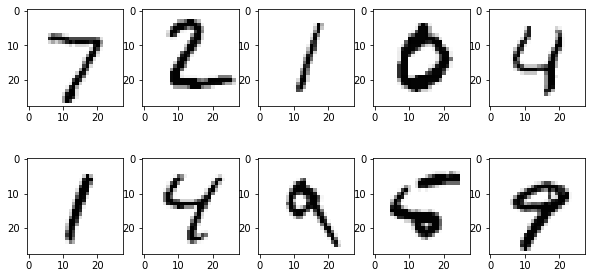

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))

for i in range(2*5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape((28, 28)), cmap = 'Greys')
    
plt.show()

### 18.5 원-핫 인코딩

* 타깃 데이터 대상 

In [170]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [171]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 18.6 딥러닝 적용하기 

#### 18.6.1 트레이닝/테스트 데이터 분할하기

In [172]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

In [173]:
X_tn.shape

(7500, 28, 28, 1)

In [174]:
y_tn.shape

(7500, 10)

#### 18.6.2 합성곱 신경망 생성

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(y_tn[0])

model = Sequential()

model.add(Conv2D(32, kernel_size = (5, 5),
                 input_shape = (28, 28, 1),
                 padding = 'valid',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size = (3, 3),
                 padding = 'valid',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation = 'softmax'))
model.summary()          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [176]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [177]:
hist = model.fit(X_tn, y_tn, epochs = 10, batch_size = 100)

Epoch 1/10
75/75 [==============================] - 2s 21ms/step - loss: 0.7638 - accuracy: 0.7493
Epoch 2/10
75/75 [==============================] - 2s 20ms/step - loss: 0.2275 - accuracy: 0.9255
Epoch 3/10
75/75 [==============================] - 1s 20ms/step - loss: 0.1491 - accuracy: 0.9515
Epoch 4/10
75/75 [==============================] - 2s 21ms/step - loss: 0.1078 - accuracy: 0.9637
Epoch 5/10
75/75 [==============================] - 2s 20ms/step - loss: 0.0905 - accuracy: 0.9703
Epoch 6/10
75/75 [==============================] - 2s 21ms/step - loss: 0.0809 - accuracy: 0.9737
Epoch 7/10
75/75 [==============================] - 2s 20ms/step - loss: 0.0658 - accuracy: 0.9787
Epoch 8/10
75/75 [==============================] - 2s 21ms/step - loss: 0.0528 - accuracy: 0.9812
Epoch 9/10
75/75 [==============================] - 2s 20ms/step - loss: 0.0535 - accuracy: 0.9812
Epoch 10/10
75/75 [==============================] - 2s 21ms/step - loss: 0.0464 - accuracy: 0.9835


#### 18.6.3 트레이닝 데이터 평가

In [178]:
print(model.evaluate(X_tn, y_tn)[1])

235/235 [==============================] - 1s 4ms/step - loss: 0.0183 - accuracy: 0.9937
0.9937333464622498


#### 18.6.4 테스트 데이터 평가

In [179]:
print(model.evaluate(X_te, y_te)[1])

79/79 [==============================] - 0s 4ms/step - loss: 0.0533 - accuracy: 0.9812
0.9811999797821045
